In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="dark")
import numpy as np
import pandas as pd
import scipy.io as sio

In [13]:
mat = sio.loadmat('./data/faces.mat')
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
print(X.shape)

(5000, 1024)


In [24]:
# image display functions ---------------------------------------
def plot_n_image(X, n):
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n,]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,sharey=True, sharex=True, figsize=(6, 6))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


# PCA functions ---------------------------------------
def normalize(X):
    X_copy = X.copy()
    m, n = X_copy.shape
    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()
    return X_copy


def pca(X):
    X_norm = normalize(X)
    X_=X.T/np.sqrt(X.shape[0]-1)
    U, S, V = np.linalg.svd(X_) 
    return U, S, V

def project_data(X, U, k):
    m, n = X.shape
    if k > n:
        raise ValueError('维度k应该不大于n')
        
    return X@U[:,:k]


def recover_data(Z, U):
    m, n = Z.shape
    return Z@U[:,:n].T


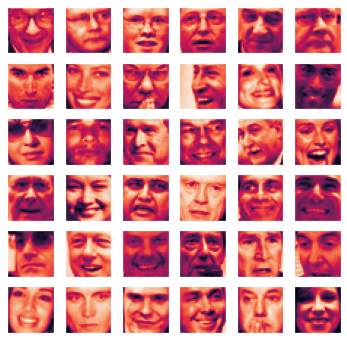

In [25]:
plot_n_image(X, n=36)
plt.show()

In [26]:
U, S, V = pca(X)
print(U.shape)
print(S.shape)
print(V.shape)

(1024, 1024)
(1024,)
(5000, 5000)


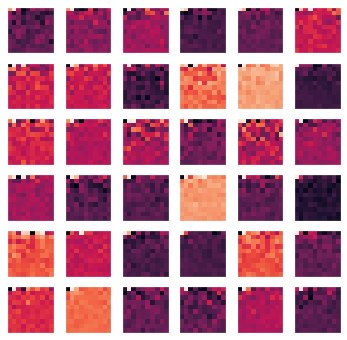

In [27]:
'''
可以看到每一个图像压缩到了100维，且每个图像重点非常突出，但是无法识别面部特征了
数据集的大小可以显著地加快学习算法的速度。
例如，如在训练一个神经网络来进行人的识别-初始化（生成一张人脸图像，预测该人的身份），您可以使用
该维数减少了100个维度的输入，而不是原始维度的像素。
'''
Z = project_data(X, U, k=100)
plot_n_image(Z, n=36)
plt.show()

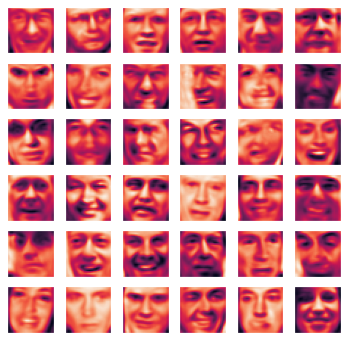

In [28]:
#现在恢复原来的结构并再次渲染，可以看到数据丢失课很多细节，但重点更突出了
X_recover = recover_data(Z, U)
plot_n_image(X_recover, n=36)
plt.show()

In [31]:
from sklearn.decomposition import PCA

In [32]:
sk_pca = PCA(n_components=100)
Z = sk_pca.fit_transform(X)

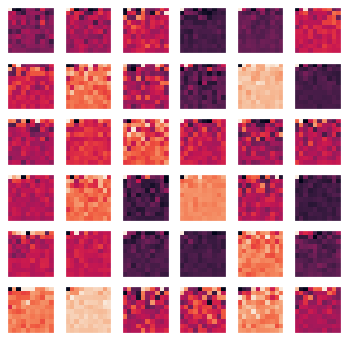

In [34]:
plot_n_image(Z, 36)
plt.show()

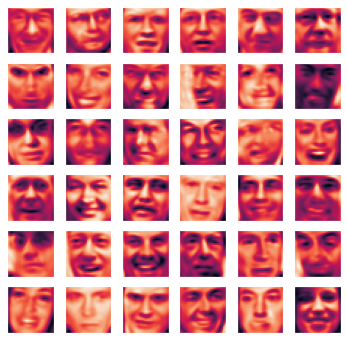

In [35]:
X_recover = sk_pca.inverse_transform(Z)
plot_n_image(X_recover, n=36)
plt.show()